# Decision Tree

## import dependencies

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Task 1: Data Preparation

In [5]:
# Load the dataset
file_path = "heart_disease.xlsx"  

df_data = pd.read_excel(file_path, sheet_name="Heart_disease")

In [7]:
df_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
df_data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [13]:
# Handle missing values in 'oldpeak'
df_data["oldpeak"].fillna(df_data["oldpeak"].median(), inplace=True)

In [15]:
df_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

## Task 2: Exploratory Data Analysis (EDA)

In [19]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [21]:
df_data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.864537,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.060433,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


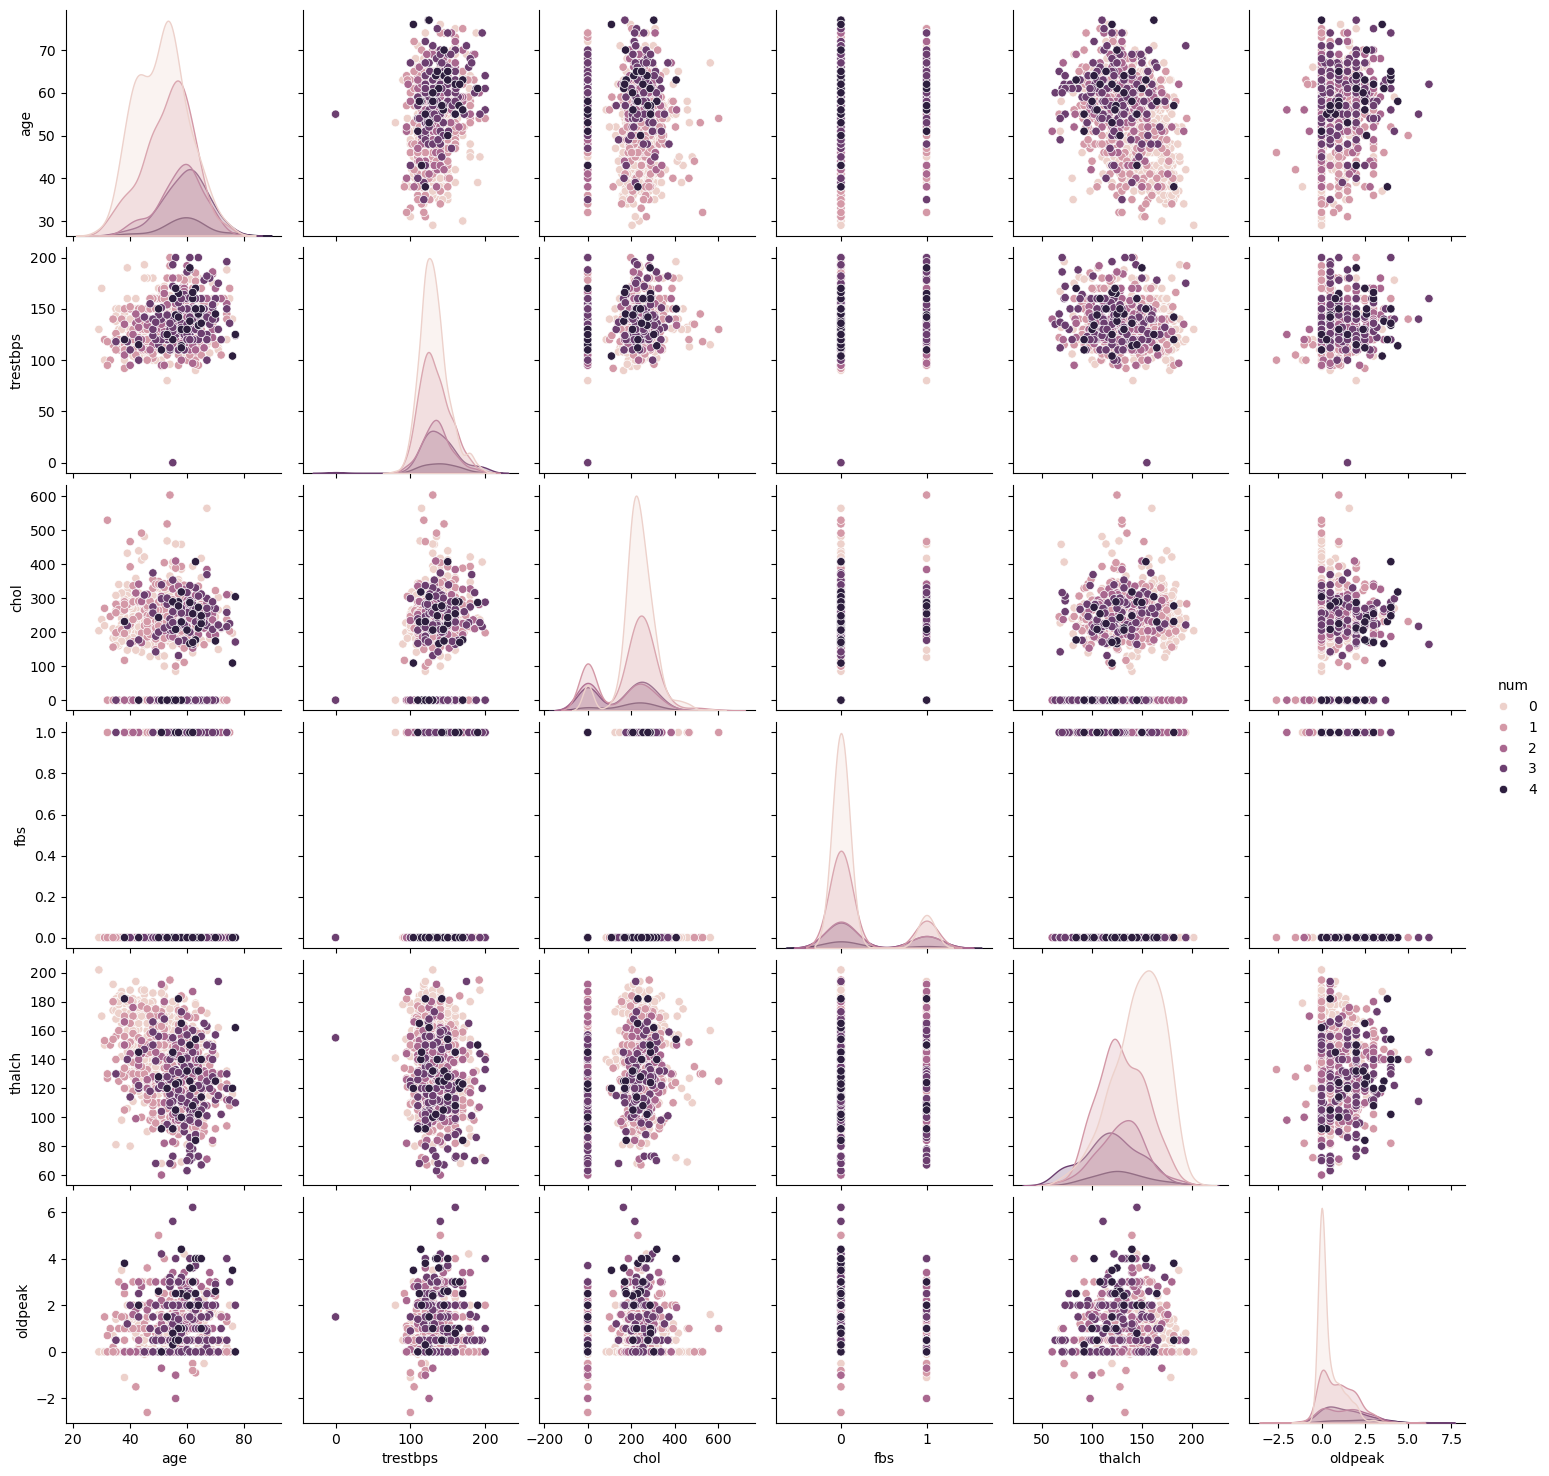

In [23]:
# Visualize distributions
sns.pairplot(df_data, hue="num")
plt.show()

## Task 3: Feature Engineering

In [28]:
# Encode categorical variables
categorical_cols = ["sex", "cp", "restecg", "exang", "slope", "thal"]
for col in categorical_cols:
    df_data[col] = LabelEncoder().fit_transform(df_data[col])

df_data["fbs"] = df_data["fbs"].astype(int)

In [30]:
# Define features and target
X = df_data.drop(columns=["num"])
y = (df_data["num"] > 0).astype(int)

## Task 4: Decision Tree Classification

In [33]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
# Train the initial Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [37]:
# Evaluate initial model
print("Initial Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Initial Accuracy: 0.7527472527472527
Confusion Matrix:
 [[60 20]
 [25 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73        80
           1       0.79      0.75      0.77       102

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.76      0.75      0.75       182



## Task 5: Hyperparameter Tunin#g

In [40]:
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [42]:
# Train optimized model
best_params = grid_search.best_params_
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)
y_pred_best = best_clf.predict(X_test)

## Task 6: Model Evaluation and Analysis

In [45]:
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))
print("Optimized Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_best))

Optimized Accuracy: 0.7197802197802198
Optimized Confusion Matrix:
 [[57 23]
 [28 74]]
Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69        80
           1       0.76      0.73      0.74       102

    accuracy                           0.72       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.72      0.72      0.72       182



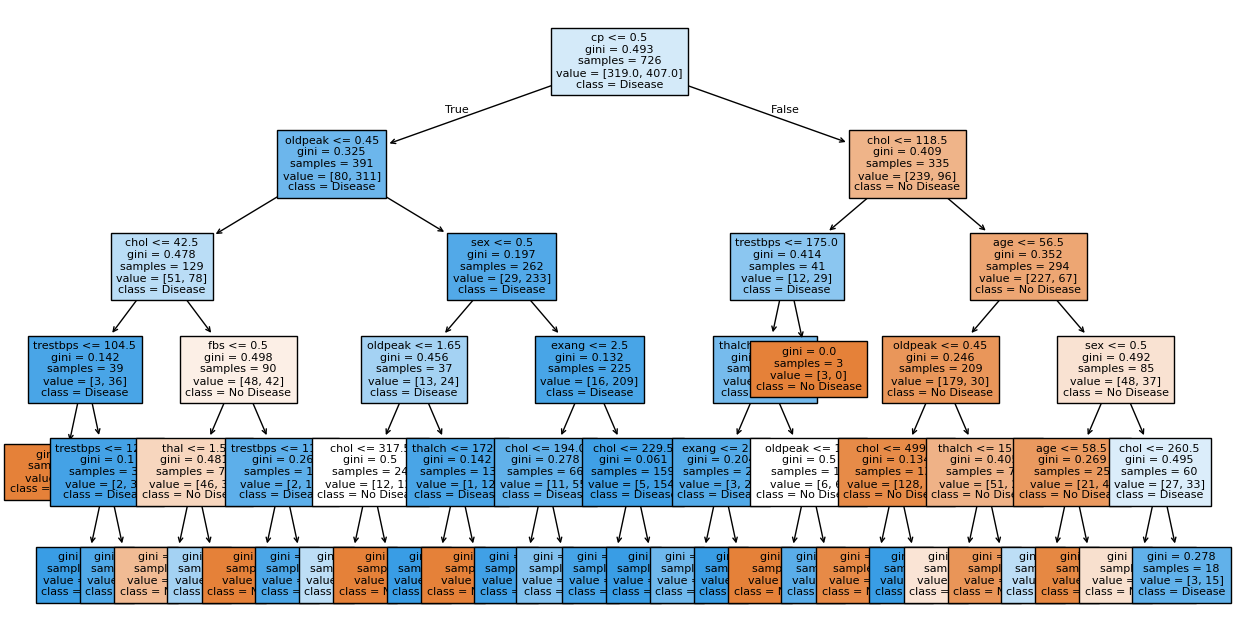

In [47]:
# Visualize Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(best_clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, fontsize=8)
plt.show()

# Interview Question

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Common Hyperparameters of Decision Tree Models:

1 max_depth: Limits the tree's depth, preventing overfitting.

2 min_samples_split: Minimum samples required to split a node. Higher values reduce overfitting.

3 min_samples_leaf: Minimum samples in a leaf node. Higher values create a simpler model.

4 max_features: Limits the number of features considered at each split, improving generalization.

5 criterion: Splitting measure (gini or entropy), affecting how nodes are split.

### 2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding vs. One-Hot Encoding:

1. Label Encoding: Assigns a unique integer to each category. Suitable for ordinal data but may introduce unintended order for nominal data.

2. One-Hot Encoding: Creates binary columns for each category. Suitable for nominal data, prevents ordinal relationships.